# **Naive Bayes**

## **Pengertian Naive Bayes**

Naïve Bayes adalah salah satu algoritma yang umum digunakan dalam penambangan data (data mining) dan machine learning, terutama untuk klasifikasi.Naive bayes merupakan metode pengklasifikasian berdasarkan probabilitas sederhana dan dirancang agar dapat dipergunakan dengan asumsi antar variabel penjelas saling bebas (independen), pada algoritma ini didasarkan pada teorema Bayes, yang memungkinkan prediksi probabilitas suatu kelas berdasarkan fitur-fitur yang ada, dengan asumsi bahwa semua fitur bersifat independen satu sama lain.

Algoritma ini menggunakan rumus dasar dari teorema Bayes:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

* P(A|B) : Probabilitas A terjadi, dengan syarat B sudah terjadi. Ini disebut probabilitas kondisional.

* P(B|A) : Probabilitas B terjadi jika A benar.

* P(A) : Probabilitas awal (prior) dari A — seberapa besar kemungkinan A terjadi tanpa mempertimbangkan B.

* P(B) : Probabilitas dari B, yang berfungsi sebagai normalisasi supaya hasilnya valid sebagai probabilitas.

## **Langkah-langkah implementasi Naive Bayes**

1. Pengumpulan Data

  Kumpulkan dataset yang relevan yang mencakup atribut atau fitur yang diperlukan untuk klasifikasi. Dataset ini dapat berasal dari sumber publik atau domain tertentu

2. Persiapan Data
  * Lakukan pembersihan data, termasuk penghapusan nilai yang hilang dan penanganan outlier.

  * Normalisasi data jika diperlukan, terutama jika atribut memiliki rentang nilai yang berbeda.

  * Pisahkan dataset menjadi data pelatihan (training) dan data pengujian (testing), umumnya dengan proporsi 70% untuk pelatihan dan 30% untuk pengujian

3. Penerapan Naive Bayes dan Regresi Logistik

  Kedua model, Naive Bayes dan regresi logistik, dilatih menggunakan data training, dan prediksi dilakukan terhadap data testing.

4. Evaluasi Model

  Metrik evaluasi yang digunakan meliputi akurasi, precision, recall, F1-score, dan confusion matrix untuk melihat performa dari kedua model

## **Berikut Ini contoh implementasi menggunakan data iris**

In [ ]:
%pip install pymysql
%pip install psycopg2

## **Mengambil/Mengumpulkan data iris**

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-pendata-ahmadsyauqifuady33-3378.c.aivencloud.com",
        user="avnadmin",
        password="AVNS_6qwFNwK5B4vuVyZEVWE",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          55.4         65.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           3.6          1.5           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           6.5          1.3
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           4.7          3.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2          33.8         45.4
 13     Iris-setosa           1.4     

## **Menmfilter data yang telah dikumpulkan**

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-pendata-ahmadsyauqifuady33-3378.c.aivencloud.com",
        user="avnadmin",
        password="AVNS_6qwFNwK5B4vuVyZEVWE",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Pastikan ada kolom numerik untuk LOF
numeric_columns = df_merged.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    # Terapkan LOF
    lof = LocalOutlierFactor(n_neighbors=20)
    df_merged['LOF_Score'] = lof.fit_predict(df_merged[numeric_columns])

    # Pisahkan data outlier dan data normal
    df_outliers = df_merged[df_merged['LOF_Score'] == -1]
    df_normal = df_merged[df_merged['LOF_Score'] == 1]

    # Tampilkan jumlah outlier
    print(f"Jumlah data yang terindikasi outlier: {len(df_outliers)}\n")

    # Tampilkan data outlier
    if not df_outliers.empty:
        print("Data yang terdeteksi sebagai outlier:")
        print(df_outliers.to_string(index=False))
    else:
        print("Tidak ada outlier yang terdeteksi.")
else:
    print("Tidak ada kolom numerik untuk LOF.")


Jumlah data yang terindikasi outlier: 15

Data yang terdeteksi sebagai outlier:
 id           class  petal_length  petal_width  sepal_length  sepal_width  LOF_Score
  1     Iris-setosa          55.4         65.2           5.1          3.5         -1
  2     Iris-setosa          14.0          2.0          40.9         30.0         -1
 12     Iris-setosa           1.6          0.2          33.8         45.4         -1
 19     Iris-setosa           1.7          0.3          25.0         11.7         -1
 35     Iris-setosa          75.5         54.1          12.4          6.3         -1
 54 Iris-versicolor           4.0          1.3          23.7          1.5         -1
 59 Iris-versicolor           4.6          1.3          61.6         22.9         -1
 65 Iris-versicolor          35.6          1.3          14.6          3.3         -1
 70 Iris-versicolor           3.9          1.1           5.6         29.5         -1
 77 Iris-versicolor          44.8          1.4          13.5          

## **Menampilkan data yang telah difilter**

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-pendata-ahmadsyauqifuady33-3378.c.aivencloud.com",
        user="avnadmin",
        password="AVNS_6qwFNwK5B4vuVyZEVWE",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Pastikan ada kolom numerik untuk LOF
numeric_columns = df_merged.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    # Terapkan LOF
    lof = LocalOutlierFactor(n_neighbors=20)
    df_merged['LOF_Score'] = lof.fit_predict(df_merged[numeric_columns])

    # Pisahkan data bersih
    df_cleaned = df_merged[df_merged['LOF_Score'] == 1].drop(columns=['LOF_Score'])

    # Menampilkan data bersih setelah filtering
    print("\nData bersih setelah filtering:")
    print(df_cleaned.to_string(index=False))

else:
    print("Tidak ada kolom numerik untuk LOF.")



Data bersih setelah filtering:
 id           class  petal_length  petal_width  sepal_length  sepal_width
  3     Iris-setosa           3.6          1.5           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           6.5          1.3
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           4.7          3.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 13     Iris-setosa           1.4          0.1           4.8          3.0
 14     Iris-setosa           1.1          0.1           2.1          5.5
 15     Iris-setosa           1.2          0.2           1.2          5.6
 16   

## **Memisahkan dataset menjadi data pelatihan (training) dan data pengujian (testing)**

In [13]:
    # Pisahkan data menjadi training (80%) dan testing (20%)
    train_data, test_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)

    # Tampilkan jumlah data setelah pembagian
    print(f"\nJumlah data bersih setelah filtering: {len(df_cleaned)}")
    print(f"Jumlah data training: {len(train_data)}")
    print(f"Jumlah data testing: {len(test_data)}")


Jumlah data bersih setelah filtering: 135
Jumlah data training: 108
Jumlah data testing: 27


## **Implementasi**

Number of mislabeled points with outliers out of a total 30 points : 22
Accuracy with outliers: 26.67%
Mislabeled points with outliers:
Index: 1, True Label: Iris-setosa, Predicted: Iris-virginica
Index: 2, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 5, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 7, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 10, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 11, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 12, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 13, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 14, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 16, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 17, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 19, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 20, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 21, True Label: Iris-virgini

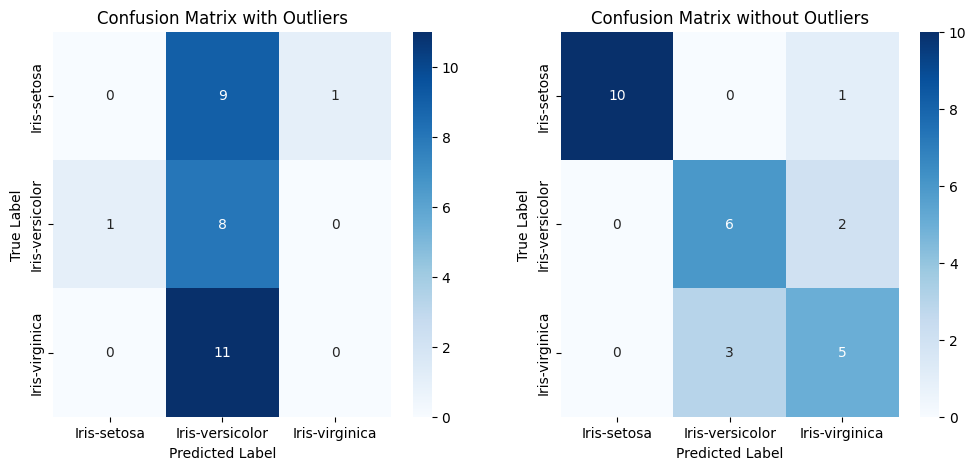

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_merged sudah ada dari kode sebelumnya

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
df_merged["class_encoded"] = label_encoder.fit_transform(df_merged["class"])

# Data dengan outlier
X_all = df_merged[feature_columns]
y_all = df_merged["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Data tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Split data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Split data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
gnb = GaussianNB()

# Latih dan uji model dengan outlier
y_pred_all = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
mislabeled_all = (y_test_all != y_pred_all).sum()
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Number of mislabeled points with outliers out of a total %d points : %d" % (X_test_all.shape[0], mislabeled_all))
print("Accuracy with outliers: %.2f%%" % (accuracy_all * 100))

# Menampilkan label yang salah pada data dengan outlier
mislabeled_indices_all = np.where(y_test_all != y_pred_all)[0]
print("Mislabeled points with outliers:")
for i in mislabeled_indices_all:
    true_label = label_encoder.inverse_transform([int(y_test_all[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_all[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")
print()
# Latih dan uji model tanpa outlier
y_pred_clean = gnb.fit(X_train_clean, y_train_clean).predict(X_test_clean)
mislabeled_clean = (y_test_clean != y_pred_clean).sum()
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Number of mislabeled points without outliers out of a total %d points : %d" % (X_test_clean.shape[0], mislabeled_clean))
print("Accuracy without outliers: %.2f%%" % (accuracy_clean * 100))

# Menampilkan label yang salah pada data tanpa outlier
mislabeled_indices_clean = np.where(y_test_clean != y_pred_clean)[0]
print("Mislabeled points without outliers:")
for i in mislabeled_indices_clean:
    true_label = label_encoder.inverse_transform([int(y_test_clean[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_clean[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_all, y_pred_all), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix with Outliers")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix without Outliers")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()